In [1]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0
def sampling(args: tuple):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape = (K.shape(z_mean)[0], latent_dim), mean = 0, stddev = epsilon_std)
    return z_mean + K.exp(z_log_var / 2)* epsilon

In [3]:
x = Input(shape = (original_dim,) , name ="input")
h = Dense(intermediate_dim, activation = 'relu' , name = "encoding")(x)
z = Dense(latent_dim , name = "latent")(h)

encoder = Model(x, z, name = "encoder")


In [4]:
input_decoder = Input(shape = (latent_dim , ) , name = "decoder_input")
decoder_h = Dense(intermediate_dim , activation = 'relu', name = "decoder_h")(input_decoder)
x_decoded = Dense(original_dim , activation = 'sigmoid' , name = "flat_decoded")(decoder_h)

decoder = Model(input_decoder , x_decoded,name = "decoder")


In [5]:
output_combined = decoder(encoder(x))
vae = Model(x, output_combined)
vae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
encoder (Functional)         (None, 2)                 201474    
_________________________________________________________________
decoder (Functional)         (None, 784)               202256    
Total params: 403,730
Trainable params: 403,730
Non-trainable params: 0
_________________________________________________________________


In [6]:
vae.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy')

In [7]:
(x_train,y_train), (x_test , y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train) , np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
vae.fit( x_train , x_train ,shuffle = True , epochs = epochs , batch_size = batch_size)

Epoch 1/50
600/600 [==============================] - 5s 8ms/step - loss: 0.2295
Epoch 2/50
600/600 [==============================] - 5s 8ms/step - loss: 0.2044
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 0.1978
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.1945
Epoch 5/50
600/600 [==============================] - 5s 8ms/step - loss: 0.1923
Epoch 6/50
600/600 [==============================] - 6s 9ms/step - loss: 0.1907
Epoch 7/50
600/600 [==============================] - 5s 8ms/step - loss: 0.1893
Epoch 8/50
600/600 [==============================] - 4s 7ms/step - loss: 0.1882
Epoch 9/50
600/600 [==============================] - 5s 8ms/step - loss: 0.1872
Epoch 10/50
600/600 [==============================] - 5s 8ms/step - loss: 0.1864
Epoch 11/50
600/600 [==============================] - 4s 7ms/step - loss: 0.1855A: 0s 
Epoch 12/50
600/600 [==============================] - 4s 7ms/step - loss: 0.1848
Epoch 13/50
600/60

In [9]:
import matplotlib.pyplot as plt

In [27]:
x_train_img = x_train[2].reshape(28,28)

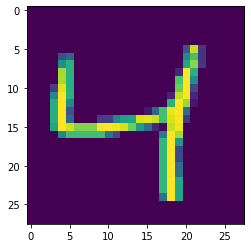

In [28]:
plt.imshow(x_train_img)

In [12]:
type(x_decoded)

keras.engine.keras_tensor.KerasTensor

In [13]:
type(vae)

keras.engine.functional.Functional

In [14]:
type(output_combined)

keras.engine.keras_tensor.KerasTensor

In [15]:
import tensorflow as tf

img_tensor = tf.convert_to_tensor(output_combined)

In [16]:
type(img_tensor)

keras.engine.keras_tensor.KerasTensor

In [17]:
x = tf.constant([[1,2,3],[4,5,6],[7,8,9]])

In [18]:
type(x)

tensorflow.python.framework.ops.EagerTensor

In [19]:
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [20]:
x_1 = x.numpy()

In [21]:
print(x_1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [22]:
print(output_combined)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), name='decoder/flat_decoded/Sigmoid:0', description="created by layer 'decoder'")


In [23]:
print(output_combined[0])

KerasTensor(type_spec=TensorSpec(shape=(784,), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


In [24]:
output = output_combined[0].reshape(28,28)

AttributeError: 'KerasTensor' object has no attribute 'reshape'

In [ ]:
type(vae)

In [ ]:
print(vae)

In [25]:
img = vae.predict(x_train)

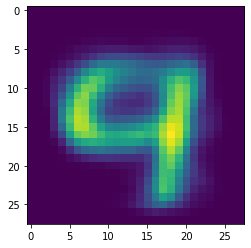

In [29]:
plt.imshow(img[2].reshape(28,28))

In [30]:
print(x_train.shape[0])

60000
